In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("pimaDiabetes.csv")

# Separate features and labels
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

# Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# SMOTE Oversampling
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Decision Tree on unbalanced dataset
dt_params = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
dt_grid_unbalanced = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, scoring='recall', cv=5)
dt_grid_unbalanced.fit(X_train, y_train)  # Train on unbalanced data
best_dt_unbalanced = dt_grid_unbalanced.best_estimator_

# Logistic Regression on unbalanced dataset
lr_params = {'C': [0.1, 1, 10], 'solver': ['liblinear']}
lr_grid_unbalanced = GridSearchCV(LogisticRegression(random_state=42), lr_params, scoring='recall', cv=5)
lr_grid_unbalanced.fit(X_train, y_train)  # Train on unbalanced data
best_lr_unbalanced = lr_grid_unbalanced.best_estimator_

In [8]:
# Decision Tree model on Random Oversampling
dt_grid_ros = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, scoring='recall', cv=5)
dt_grid_ros.fit(X_ros, y_ros)
best_dt_ros = dt_grid_ros.best_estimator_

# Logistic Regression model on SMOTE
lr_grid_smote = GridSearchCV(LogisticRegression(random_state=42), lr_params, scoring='recall', cv=5)
lr_grid_smote.fit(X_smote, y_smote)
best_lr_smote = lr_grid_smote.best_estimator_

In [9]:
from sklearn.metrics import classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Evaluate Decision Tree model on unbalanced test set
y_pred_dt_unbalanced = best_dt_unbalanced.predict(X_test)
print("Decision Tree Classification Report (Unbalanced):")
print(classification_report(y_test, y_pred_dt_unbalanced))

# Evaluate Logistic Regression model on unbalanced test set
y_pred_lr_unbalanced = best_lr_unbalanced.predict(X_test)
print("Logistic Regression Classification Report (Unbalanced):")
print(classification_report(y_test, y_pred_lr_unbalanced))

Decision Tree Classification Report (Unbalanced):
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       150
           1       0.44      0.33      0.38        36

    accuracy                           0.79       186
   macro avg       0.65      0.62      0.63       186
weighted avg       0.77      0.79      0.78       186

Logistic Regression Classification Report (Unbalanced):
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       150
           1       0.58      0.39      0.47        36

    accuracy                           0.83       186
   macro avg       0.72      0.66      0.68       186
weighted avg       0.81      0.83      0.81       186



In [10]:
# Evaluate Decision Tree model on Random Oversampling
y_pred_dt_ros = best_dt_ros.predict(X_test)
print("Decision Tree Classification Report (Random Oversampling):")
print(classification_report(y_test, y_pred_dt_ros))

# Evaluate Logistic Regression model on SMOTE
y_pred_lr_smote = best_lr_smote.predict(X_test)
print("Logistic Regression Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_lr_smote))

Decision Tree Classification Report (Random Oversampling):
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       150
           1       0.42      0.31      0.35        36

    accuracy                           0.78       186
   macro avg       0.63      0.60      0.61       186
weighted avg       0.76      0.78      0.77       186

Logistic Regression Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       150
           1       0.43      0.64      0.52        36

    accuracy                           0.77       186
   macro avg       0.67      0.72      0.68       186
weighted avg       0.81      0.77      0.78       186



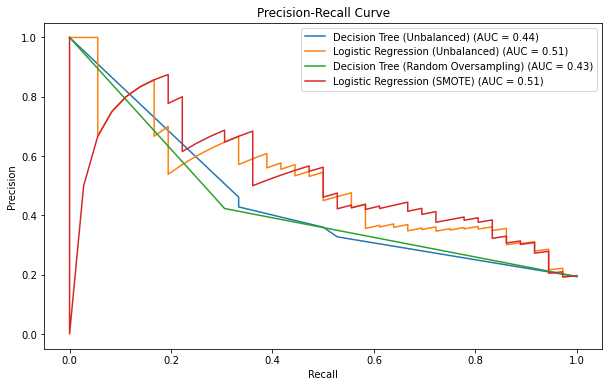

In [11]:
# Plot Precision-Recall curve and calculate AUC
def plot_precision_recall(y_test, y_pred_proba, label):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{label} (AUC = {pr_auc:.2f})')

# Plot Precision-Recall curves for both Decision Tree and Logistic Regression
plt.figure(figsize=(10, 6))

# Unbalanced models
plot_precision_recall(y_test, best_dt_unbalanced.predict_proba(X_test)[:, 1], 'Decision Tree (Unbalanced)')
plot_precision_recall(y_test, best_lr_unbalanced.predict_proba(X_test)[:, 1], 'Logistic Regression (Unbalanced)')

# Balanced models
plot_precision_recall(y_test, best_dt_ros.predict_proba(X_test)[:, 1], 'Decision Tree (Random Oversampling)')
plot_precision_recall(y_test, best_lr_smote.predict_proba(X_test)[:, 1], 'Logistic Regression (SMOTE)')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()